In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.animation as animation

In [2]:
df = pd.read_excel('CA_Results_Former_new_EOs.xlsx',sheet_name='gender2').fillna(0)
df = df.rename(columns=
    {'Company Name':'company'}
    )    
df['Total'] = df.Females+df.Males
df

,date,company,Females,Female%,Males,Male%,Total
0,2020-06-20,Woodside Petroleum Ltd.,5.0,0.555556,4,0.444444,9.0
1,2020-06-20,BHP Billiton,4.0,0.500000,4,0.500000,8.0
2,2020-06-20,South32 Limited,4.0,0.444444,5,0.555556,9.0
3,2020-06-20,Wesfarmers,5.0,0.416667,7,0.583333,12.0
4,2020-06-20,Procter & Gamble Company,14.0,0.400000,21,0.600000,35.0
...,...,...,...,...,...,...,...
300,2021-09-27,Formosa Petrochemical,0.0,0.000000,11,1.000000,11.0
301,2021-09-27,Coal India,0.0,0.000000,5,1.000000,5.0
302,2021-09-27,Anhui Conch Cement,0.0,0.000000,4,1.000000,4.0
303,2021-09-27,PACCAR Inc,0.0,0.000000,2,1.000000,2.0


## Filtering out companies with very few excutives.

In [3]:
ten_or_more = df.loc[df.Total>=10]
eight_or_more = df.loc[df.Total>=8]
print(ten_or_more.count()['Total'],'of 305 companies have 10 or more excutives')
print(eight_or_more.count()['Total'],'of 305 companies have 8 or more excutives')

193 of 305 companies have 10 or more excutives
242 of 305 companies have 8 or more excutives


## Decide how many companies have to be in the dataframe

In [4]:
#df = ten_or_more
df = eight_or_more
df

,date,company,Females,Female%,Males,Male%,Total
0,2020-06-20,Woodside Petroleum Ltd.,5.0,0.555556,4,0.444444,9.0
1,2020-06-20,BHP Billiton,4.0,0.500000,4,0.500000,8.0
2,2020-06-20,South32 Limited,4.0,0.444444,5,0.555556,9.0
3,2020-06-20,Wesfarmers,5.0,0.416667,7,0.583333,12.0
4,2020-06-20,Procter & Gamble Company,14.0,0.400000,21,0.600000,35.0
...,...,...,...,...,...,...,...
294,2021-09-27,Lukoil OAO,0.0,0.000000,12,1.000000,12.0
296,2021-09-27,"JXTG Holdings, Inc",0.0,0.000000,15,1.000000,15.0
297,2021-09-27,Honda Motor Company,0.0,0.000000,14,1.000000,14.0
300,2021-09-27,Formosa Petrochemical,0.0,0.000000,11,1.000000,11.0


## Dataframe Manipulation

### Wide format the data

In [5]:
companys = [x for x in df.company.unique() if df.loc[df.company==x].shape[0] == df.date.nunique()] #only want companies for which we have both dates
wide_format_df_columns = list(companys)
wide_format_df_columns.insert(0,'date') 

wide_format_data = [list(df.loc[df.company == firm]['Female%'].values) for firm in companys] 
wide_format_data.insert(0,list(df.date.unique()))
time_series_female_pct = np.array(np.array(wide_format_data))

wide_format_df = pd.DataFrame(time_series_female_pct.T,columns=wide_format_df_columns)
wide_format_df

,date,Woodside Petroleum Ltd.,South32 Limited,Procter & Gamble Company,Bluescope Steel Limited,Vistra Energy Corp.,Cummins Inc.,Danone S.A.,The Coca-Cola Company,Air Liquide S.A,...,Lukoil OAO,"JXTG Holdings, Inc",Honda Motor Company,"Hitachi, Ltd.",Formosa Petrochemical,Eni SpA,"Daikin Industries, Ltd.",China Shenhua Energy,Rolls-Royce,Glencore plc
0,2020-06-20,0.555556,0.444444,0.4,0.4,0.4,0.388889,0.375,0.367347,0.357143,...,0,0,0,0,0,0,0,0,0,0
1,2021-09-27,0.5,0.375,0.333333,0.444444,0.555556,0.45,0.333333,0.439024,0.357143,...,0,0,0,0.0322581,0,0.2,0.0294118,0.125,0,0.0588235


### Merge dataframes

In [6]:
df2 = df.loc[df.date=='2021-09-27'].sort_values('company')
df1 = df.loc[df.date!='2021-09-27'].sort_values('company')
df_merge = pd.merge(df1,df2,on=['company','company'])
df_merge['Total_percentage'] = 1.0
df_merge

,date_x,company,Females_x,Female%_x,Males_x,Male%_x,Total_x,date_y,Females_y,Female%_y,Males_y,Male%_y,Total_y,Total_percentage
0,2020-06-20,AGL Energy Limited,3.0,0.333333,6,0.666667,9.0,2021-09-27,3.0,0.333333,6,0.666667,9.0,1.0
1,2020-06-20,Adelaide Brighton Ltd,2.0,0.222222,7,0.777778,9.0,2021-09-27,2.0,0.250000,6,0.750000,8.0,1.0
2,2020-06-20,Air France KLM S.A.,4.0,0.333333,8,0.666667,12.0,2021-09-27,3.0,0.250000,9,0.750000,12.0,1.0
3,2020-06-20,Air Liquide S.A,5.0,0.357143,9,0.642857,14.0,2021-09-27,5.0,0.357143,9,0.642857,14.0,1.0
4,2020-06-20,"American Electric Power Company, Inc.",5.0,0.250000,15,0.750000,20.0,2021-09-27,7.0,0.333333,14,0.666667,21.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,2020-06-20,"Walmart, Inc.",14.0,0.304348,32,0.695652,46.0,2021-09-27,15.0,0.333333,30,0.666667,45.0,1.0
107,2020-06-20,Woodside Petroleum Ltd.,5.0,0.555556,4,0.444444,9.0,2021-09-27,4.0,0.500000,4,0.500000,8.0,1.0
108,2020-06-20,Woolworths Group Limited,5.0,0.294118,12,0.705882,17.0,2021-09-27,6.0,0.315789,13,0.684211,19.0,1.0
109,2020-06-20,Xcel Energy Inc.,3.0,0.230769,10,0.769231,13.0,2021-09-27,5.0,0.312500,11,0.687500,16.0,1.0


In [7]:

df_merge['dif'] = df_merge['Female%_y'] - df_merge['Female%_x'] 
df_merge = df_merge.sort_values('Female%_x',ascending=False)
df_merge

,date_x,company,Females_x,Female%_x,Males_x,Male%_x,Total_x,date_y,Females_y,Female%_y,Males_y,Male%_y,Total_y,Total_percentage,dif
107,2020-06-20,Woodside Petroleum Ltd.,5.0,0.555556,4,0.444444,9.0,2021-09-27,4.0,0.500000,4,0.500000,8.0,1.0,-0.055556
86,2020-06-20,South32 Limited,4.0,0.444444,5,0.555556,9.0,2021-09-27,3.0,0.375000,5,0.625000,8.0,1.0,-0.069444
7,2020-06-20,Bluescope Steel Limited,4.0,0.400000,6,0.600000,10.0,2021-09-27,4.0,0.444444,5,0.555556,9.0,1.0,0.044444
72,2020-06-20,Procter & Gamble Company,14.0,0.400000,21,0.600000,35.0,2021-09-27,12.0,0.333333,24,0.666667,36.0,1.0,-0.066667
102,2020-06-20,Vistra Energy Corp.,4.0,0.400000,6,0.600000,10.0,2021-09-27,5.0,0.555556,4,0.444444,9.0,1.0,0.155556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,2020-06-20,China Shenhua Energy,0.0,0.000000,9,1.000000,9.0,2021-09-27,1.0,0.125000,7,0.875000,8.0,1.0,0.125000
93,2020-06-20,"Toray Industries, Inc.",0.0,0.000000,17,1.000000,17.0,2021-09-27,0.0,0.000000,29,1.000000,29.0,1.0,0.000000
16,2020-06-20,China Steel Corporation,0.0,0.000000,10,1.000000,10.0,2021-09-27,0.0,0.000000,10,1.000000,10.0,1.0,0.000000
21,2020-06-20,"Daikin Industries, Ltd.",0.0,0.000000,26,1.000000,26.0,2021-09-27,1.0,0.029412,33,0.970588,34.0,1.0,0.029412


## Get statistics of difference in gender ratio over time

In [8]:
df_merge['dif'].describe()

count    111.000000
mean       0.024211
std        0.070864
min       -0.222222
25%       -0.009307
50%        0.000000
75%        0.058824
max        0.272727
Name: dif, dtype: float64

## Create plots

### creating still images and then merging them using: https://ezgif.com/maker/ezgif-3-b5cd6a3a-gif

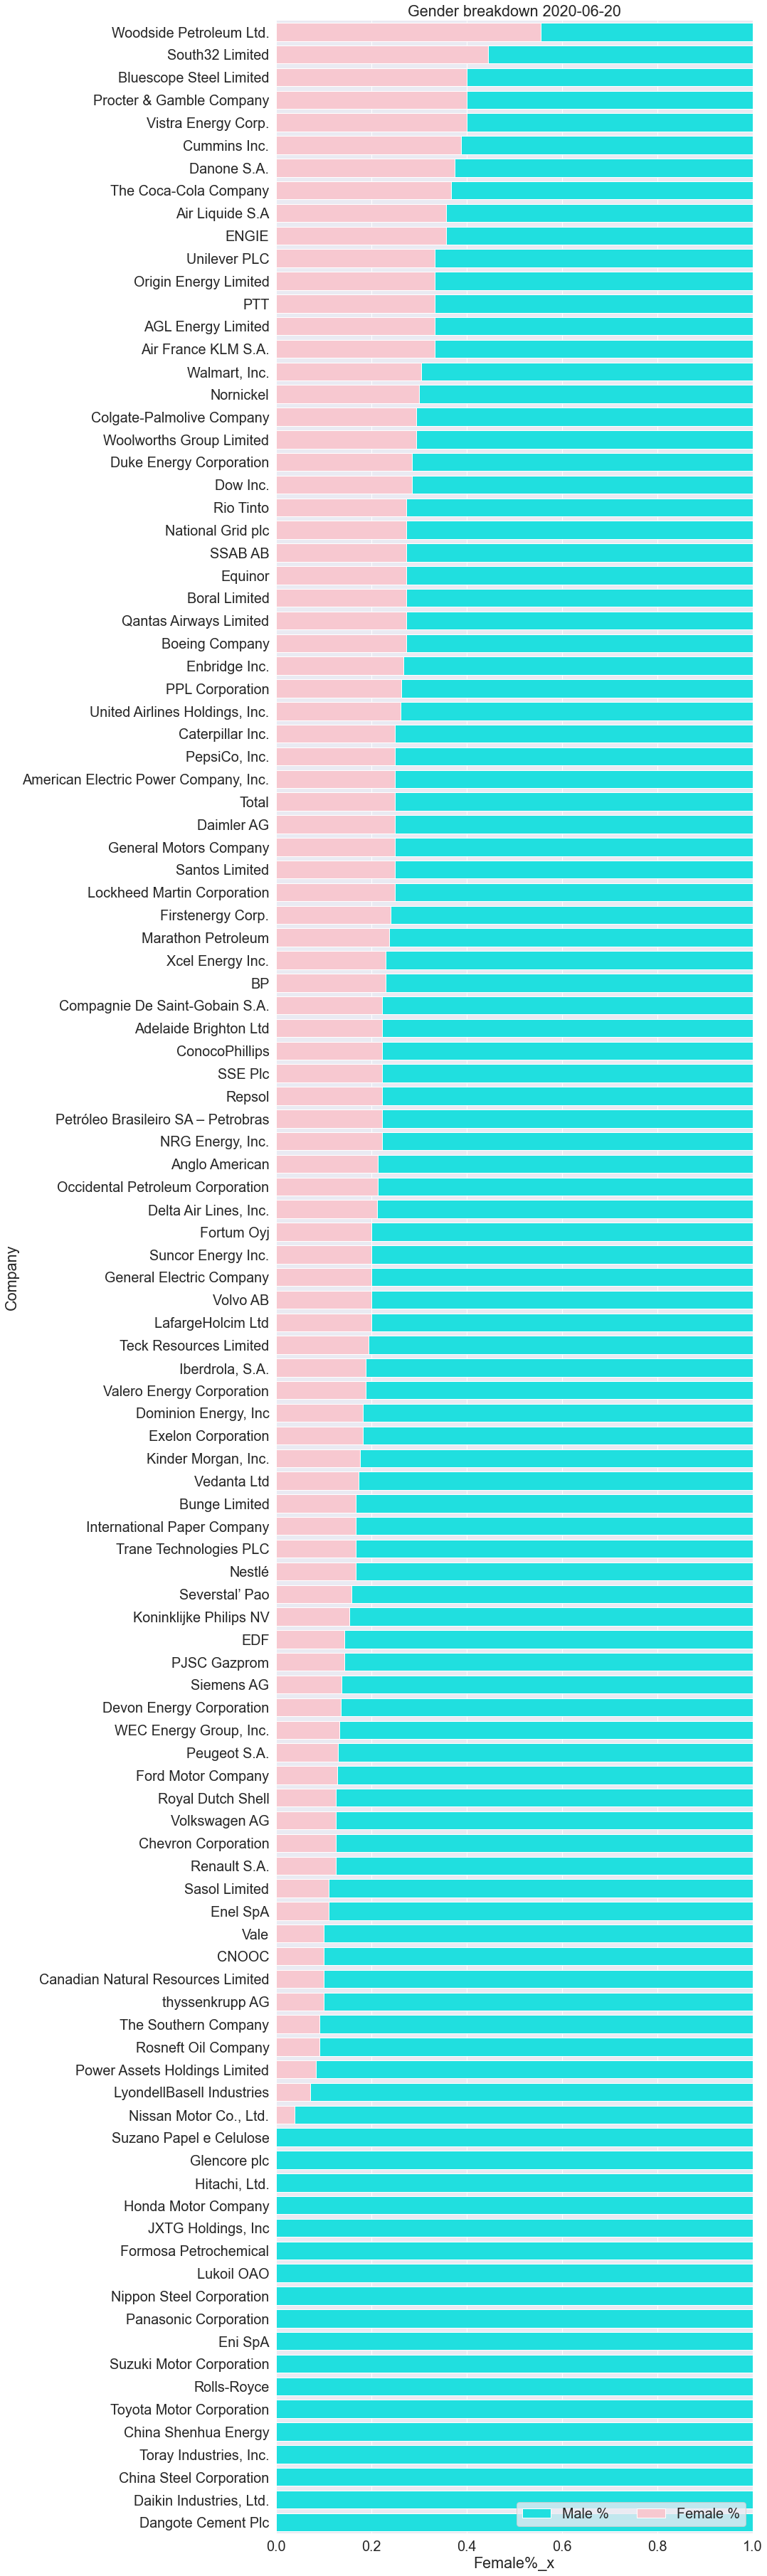

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
sns.set( font_scale=1.8)
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(12, 65))

sns.barplot(x="Total_percentage", y="company", data=df_merge,
            label="Male %", color="aqua")

sns.barplot(x="Female%_x", y="company", data=df_merge,
            label="Female %", color="pink")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 1), ylabel="Company")
ax.set_title("Gender breakdown 2020-06-20")
sns.despine(left=True, bottom=True)


In [10]:
df_merge = df_merge.sort_values('Female%_y',ascending=False)

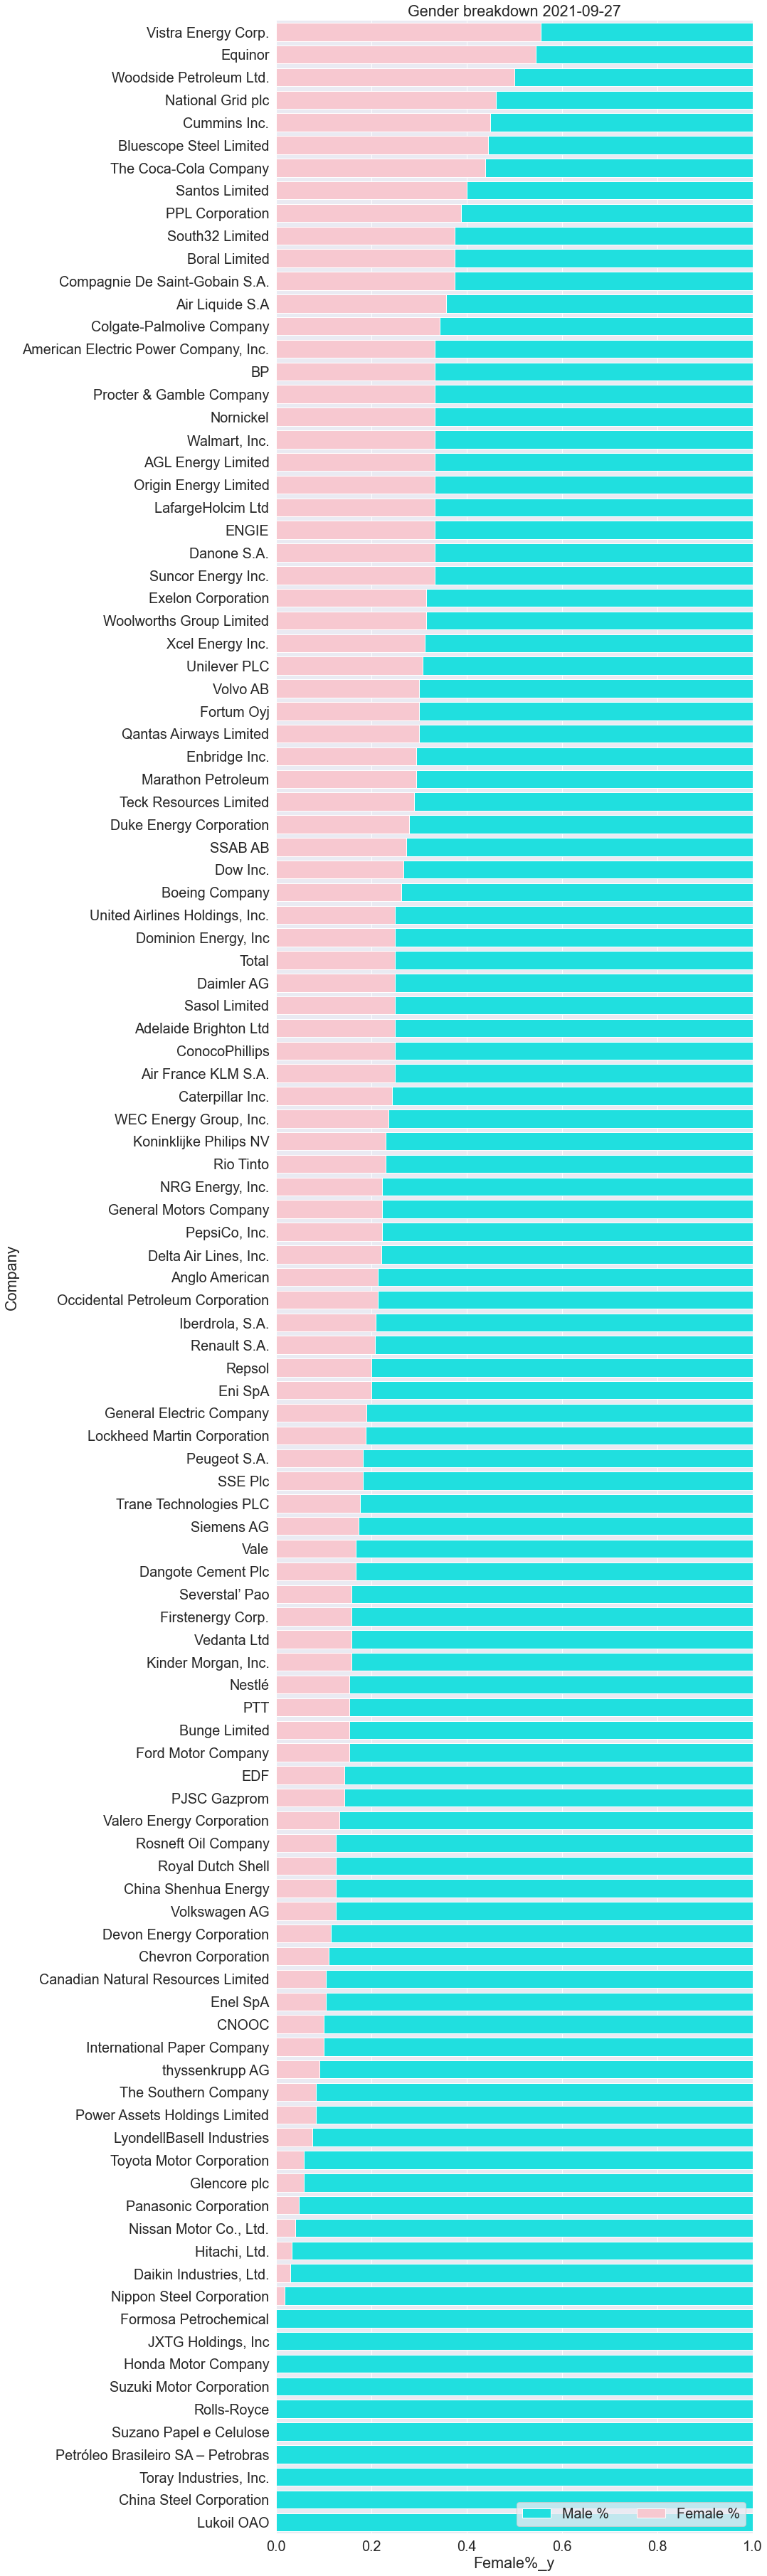

In [11]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
sns.set(font_scale=1.8)
f, ax = plt.subplots(figsize=(12, 65))

sns.barplot(x="Total_percentage", y="company", data=df_merge,
            label="Male %", color="aqua")

sns.barplot(x="Female%_y", y="company", data=df_merge,
        label="Female %", color="pink")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)

ax.set(xlim=(0, 1), ylabel="Company")
ax.set_title("Gender breakdown 2021-09-27")
sns.despine(left=True, bottom=True)

### creating animation bar race

In [12]:
wide_format_df = wide_format_df.set_index('date').apply(pd.to_numeric).apply(lambda x: x*100)

In [13]:
top50 = df_merge.sort_values(by='dif',ascending=False)[:50]['company'].values
bottom50 = df_merge.sort_values(by='dif',ascending=False)[-50:]['company'].values

In [14]:
import bar_chart_race as bcr 
import warnings
warnings.filterwarnings("ignore")

frame= 10
bcr.bar_chart_race(
    wide_format_df[bottom50],
    title = 'Change in Percentage of Female Executives Jun 2020 to September 2021',
    n_bars= 50,#wide_format_df.shape[1], 
    filename='bottom_50_gender.mp4',
    steps_per_period= 120,
    figsize=(frame, 1.6*frame), #(25,60),
    period_length=7000,
    bar_label_size= 15,  
    tick_label_size= 19,  
    title_size = 18,  

    #interpolate_period =True,
    #period_fmt="%M %-d, %Y"
    )